In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

# Read all the files in the Python environment and append all the 3 versions for Experiment Data and Blade geometry data. Now you have 2 datasets having all the information.


In [2]:
exp_1 = pd.read_csv('experiment_vol1.csv')
exp_2 = pd.read_csv('experiment_vol2.csv')
exp_3 = pd.read_csv('experiment_vol3.csv')


In [3]:
geom_1 = pd.read_csv('geom_vol1.csv')
geom_2 = pd.read_csv('geom_vol2.csv')
geom_3 = pd.read_csv('geom_vol3.csv')

In [4]:
exp_1.head()

,Propeller's Name,Blade's Name,Propeller's Brand,Number of Blades,Propeller's Diameter,Propeller's Pitch,Advanced Ratio Input,RPM Rotation Input,Thrust Coefficient Output,Power Coefficient Output,Efficiency Output
0,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.165,4000,0.0993,0.0539,0.304
1,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.214,4000,0.0947,0.0543,0.374
2,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.255,4000,0.0916,0.0548,0.427
3,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.301,4000,0.0847,0.0540,0.473
4,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.340,4000,0.0796,0.0530,0.511


In [5]:
experiment = pd.concat([exp_1, exp_2, exp_3], axis = 0)
geometry = pd.concat([geom_1, geom_2, geom_3], axis = 0)

In [6]:
geometry.shape

(2316, 7)

In [7]:
experiment.shape

(27495, 11)

# Change the variable names in line with Python identifier naming convention.

In [8]:
experiment.columns = experiment.columns.str.replace("[']",'' ).str.replace(" ", "_").str.lower()

In [9]:
geometry.columns = geometry.columns.str.replace("['/-]",'' ).str.replace(" ", "_").str.lower()

In [10]:
experiment.head(2)

,propeller's_name,blade's_name,propeller's_brand,number_of_blades,propeller's_diameter,propeller's_pitch,advanced_ratio_input,rpm_rotation_input,thrust_coefficient_output,power_coefficient_output,efficiency_output
0,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.165,4000.0,0.0993,0.0539,0.304
1,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.214,4000.0,0.0947,0.0543,0.374


In [11]:
geometry.head(2)

,blade's_name,propeller's_brand,propeller's_diameter,propeller's_pitch,adimensional_chord_-_c/r,adimensional_radius_-_r/r,beta_-_angle_relative_to_rotation
0,apc29ff 9.0x5.0,apc29ff,9.0,5.0,0.160,0.15,31.68
1,apc29ff 9.0x5.0,apc29ff,9.0,5.0,0.146,0.20,34.45


# Adimensional Radius and Adimensional Chord values are provided. Multiplying these values with Radius(R) of the blade will give you radius and chord distributions. Find these distributions for all the blades of all the propellers. Picture provided below shows a propeller with 3 blades.



In [12]:
experiment.columns = experiment.columns.str.replace("'", "") \
                                     .str.replace("/", "") \
                                     .str.replace(" ", "_") \
                                     .str.replace("-", "_") \
                                     .str.replace("__", "_").str.lower()

In [14]:
experiment.columns

Index(['propellers_name', 'blades_name', 'propellers_brand',
       'number_of_blades', 'propellers_diameter', 'propellers_pitch',
       'advanced_ratio_input', 'rpm_rotation_input',
       'thrust_coefficient_output', 'power_coefficient_output',
       'efficiency_output'],
      dtype='object')

In [15]:
geometry.columns = geometry.columns.str.replace("'", "") \
                                     .str.replace("/", "") \
                                     .str.replace(" ", "_") \
                                     .str.replace("-", "_") \
                                     .str.replace("__", "_").str.lower()

In [16]:
geometry.columns = geometry.columns.str.replace("__", "_")

geometry.columns

Index(['blades_name', 'propellers_brand', 'propellers_diameter',
       'propellers_pitch', 'adimensional_chord_cr', 'adimensional_radius_rr',
       'beta_angle_relative_to_rotation'],
      dtype='object')

In [17]:
experiment.head(2)

,propellers_name,blades_name,propellers_brand,number_of_blades,propellers_diameter,propellers_pitch,advanced_ratio_input,rpm_rotation_input,thrust_coefficient_output,power_coefficient_output,efficiency_output
0,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.165,4000.0,0.0993,0.0539,0.304
1,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.214,4000.0,0.0947,0.0543,0.374


In [18]:
geometry.head(2)

,blades_name,propellers_brand,propellers_diameter,propellers_pitch,adimensional_chord_cr,adimensional_radius_rr,beta_angle_relative_to_rotation
0,apc29ff 9.0x5.0,apc29ff,9.0,5.0,0.160,0.15,31.68
1,apc29ff 9.0x5.0,apc29ff,9.0,5.0,0.146,0.20,34.45


In [20]:
geometry.columns

Index(['blades_name', 'propellers_brand', 'propellers_diameter',
       'propellers_pitch', 'adimensional_chord_cr', 'adimensional_radius_rr',
       'beta_angle_relative_to_rotation'],
      dtype='object')

In [21]:
experiment.columns

Index(['propellers_name', 'blades_name', 'propellers_brand',
       'number_of_blades', 'propellers_diameter', 'propellers_pitch',
       'advanced_ratio_input', 'rpm_rotation_input',
       'thrust_coefficient_output', 'power_coefficient_output',
       'efficiency_output'],
      dtype='object')

For each propeller find out the area of each blade and total area of all the blades. For this calculation chord and radius values are used. Mathematically, definite integration techniques help to perform this calculation. Explore numpy.trapz for this calculation. This function helps to perform integration along the given axis using the composite trapezoidal rule.


Solidity values of propellers are considered to be very important factor affecting the performance of a UAV. Calculate the propeller's solidity. It is a dimensionless quantity which is a ratio of the area of the blades to the area of the disc.

In [26]:
experiment.propellers_name.unique()

array(['ance 8.5x6.0 - 2', 'ance 8.5x7.0 - 2', 'apc29ff 9.0x4.0 - 2',
       'apc29ff 9.0x5.0 - 2', 'apccf 7.4x8.25 - 2', 'apccf 7.8x6.0 - 2',
       'apccf 7.8x7.0 - 2', 'apce 10.0x5.0 - 2', 'apce 10.0x7.0 - 2',
       'apce 11.0x10.0 - 2', 'apce 11.0x5.5 - 2', 'apce 11.0x7.0 - 2',
       'apce 11.0x8.5 - 2', 'apce 11.0x8.0 - 2', 'apce 14.0x12.0 - 2',
       'apce 17.0x12.0 - 2', 'apce 19.0x12.0 - 2', 'apce 8.0x4.0 - 2',
       'apce 8.0x6.0 - 2', 'apce 8.0x8.0 - 2', 'apce 9.0x4.5 - 2',
       'apce 9.0x6.0 - 2', 'apce 9.0x7.5 - 2', 'apce 9.0x9.0 - 2',
       'apcsf 10.0x4.7 - 2', 'apcsf 10.0x7.0 - 2', 'apcsf 11.0x3.8 - 2',
       'apcsf 11.0x4.7 - 2', 'apcsf 11.0x7.0 - 2', 'apcsf 8.0x3.8 - 2',
       'apcsf 8.0x6.0 - 2', 'apcsf 9.0x3.8 - 2', 'apcsf 9.0x4.7 - 2',
       'apcsf 9.0x6.0 - 2', 'apcsf 9.0x7.5 - 2', 'apcsp 10.0x10.0 - 2',
       'apcsp 10.0x3.0 - 2', 'apcsp 10.0x4.0 - 2', 'apcsp 10.0x5.0 - 2',
       'apcsp 10.0x6.0 - 2', 'apcsp 10.0x7.0 - 2', 'apcsp 10.0x8.0 - 2',
       

In [27]:
solidity = {}
for prop in experiment.propellers_name.unique():
  blade_name = experiment.loc[experiment.propellers_name == prop,'blades_name'].drop_duplicates().item()
  blade_count = experiment.loc[experiment.propellers_name == prop,'number_of_blades'].drop_duplicates().item()
  diameter = experiment.loc[experiment.propellers_name == prop,'propellers_diameter'].drop_duplicates().item()
  geom_temp = geometry.loc[geometry.blades_name == blade_name,].drop_duplicates()
  nrows = geom_temp.shape[0]
  if nrows != 0 :
    chord_dist = geom_temp.adimensional_chord_cr.values * (diameter/2)
    rad_dist = geom_temp.adimensional_radius_rr.values * (diameter/2)
    blade_area = np.sum((chord_dist[:-1] + chord_dist[1:]) * (rad_dist[1:] - rad_dist[:-1]) / 2)
    disc_area = np.pi * ((diameter/2) ** 2)
    sol = blade_area* blade_count/disc_area
    solidity.update({prop : sol})
solidity_df = pd.DataFrame(solidity, index = ['solidity']).T.reset_index().rename(columns = {'index': 'propellers_name'})
solidity_df.head(2)

,propellers_name,solidity
0,apc29ff 9.0x5.0 - 2,0.072861
1,apce 10.0x5.0 - 2,0.080580


In [28]:
solidity_df.describe()

,solidity
count,134.000000
mean,0.096962
std,0.038272
min,0.054743
25%,0.077043
50%,0.084909
75%,0.097725
max,0.300871


# Check if we were able to calculate the solidity values of all the propellers. Describe your findings in detail. Use appropriate visualization to showcase your findings.


In [29]:
experiment.propellers_name.nunique()

240

In [30]:
solidity_df.propellers_name.nunique()

134

## there is a difference in the count of propeller info present in experiment data vs the solidity data 
## we can add solidity column to original experiment data and check for the missing values in that column


In [31]:
new_exp = pd.merge(experiment, solidity_df, how = 'left')

In [32]:
new_exp.shape

(27495, 12)

In [33]:
new_exp.isna().sum(axis = 0)

propellers_name                  0
blades_name                      0
propellers_brand                 0
number_of_blades                 0
propellers_diameter              0
propellers_pitch                 0
advanced_ratio_input             0
rpm_rotation_input               0
thrust_coefficient_output        0
power_coefficient_output         0
efficiency_output                0
solidity                     13284
dtype: int64

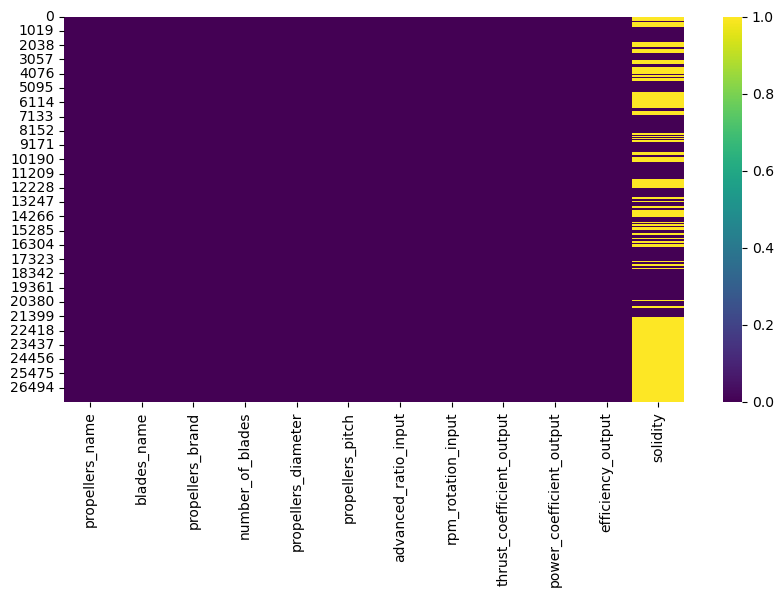

In [35]:
plt.figure(figsize = (10,5))
sns.heatmap(new_exp.isna(), cmap = 'viridis')
plt.show()

# Create appropriate visualizations to perform bivariable analysis. Share your thoughts.

- solidity and pitch ratio are used to compare performences of propellers.
- pitch ratio is pitch to diameter ratio

- compare all brands

In [36]:
new_exp.propellers_brand.value_counts()

propellers_brand
ancf       5990
apcsp      3963
apce       2108
gwsdd      1533
apcsf      1322
grsn       1103
mas        1029
magf       1023
ma          977
gwssf       801
grcp        786
da4052      733
nr640       724
kyosho      690
da4002      538
grcsp       524
mae         434
apccf       421
da4022      420
kavfk       413
pl          300
ance        235
mi          230
zin         225
apc29ff     201
apcff       183
mit         127
kpf         120
union        93
vp           88
rusp         84
ef           77
Name: count, dtype: int64

In [37]:
new_exp.columns

Index(['propellers_name', 'blades_name', 'propellers_brand',
       'number_of_blades', 'propellers_diameter', 'propellers_pitch',
       'advanced_ratio_input', 'rpm_rotation_input',
       'thrust_coefficient_output', 'power_coefficient_output',
       'efficiency_output', 'solidity'],
      dtype='object')

Propeller perfomance can be measured with "advance Ratio" that factors in the speed and thrust coefficient.

In [38]:
new_exp['pitch_ratio'] = new_exp['propellers_pitch']/new_exp['propellers_diameter']

In [39]:
new_exp.head(2)

,propellers_name,blades_name,propellers_brand,number_of_blades,propellers_diameter,propellers_pitch,advanced_ratio_input,rpm_rotation_input,thrust_coefficient_output,power_coefficient_output,efficiency_output,solidity,pitch_ratio
0,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.165,4000.0,0.0993,0.0539,0.304,NaN,0.705882
1,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.214,4000.0,0.0947,0.0543,0.374,NaN,0.705882


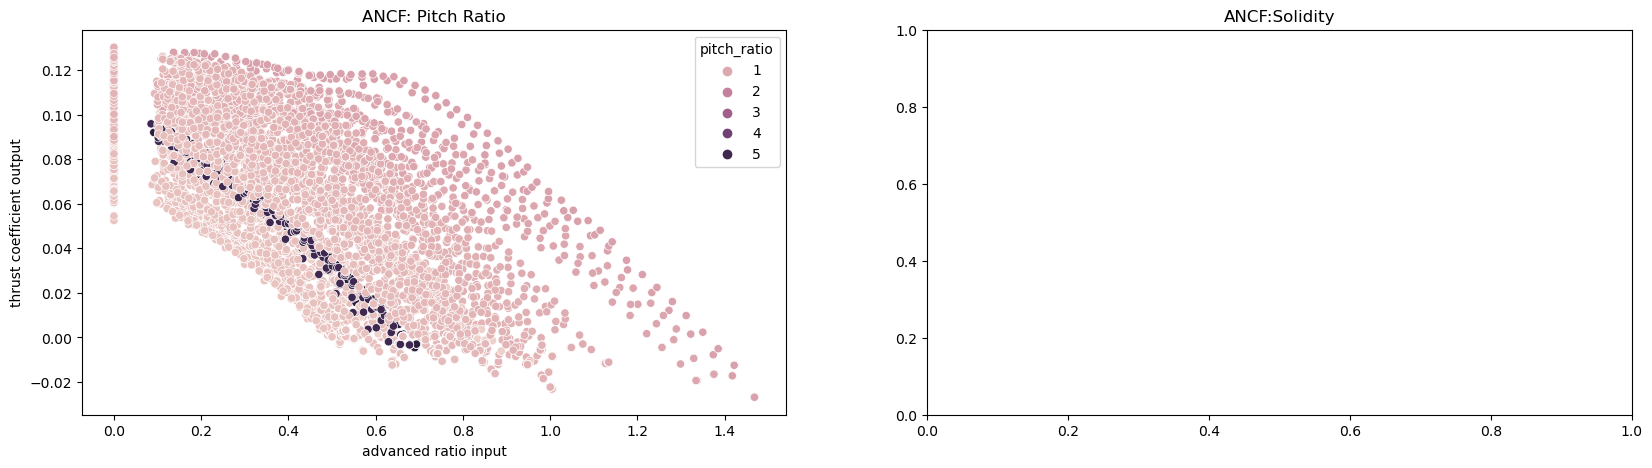

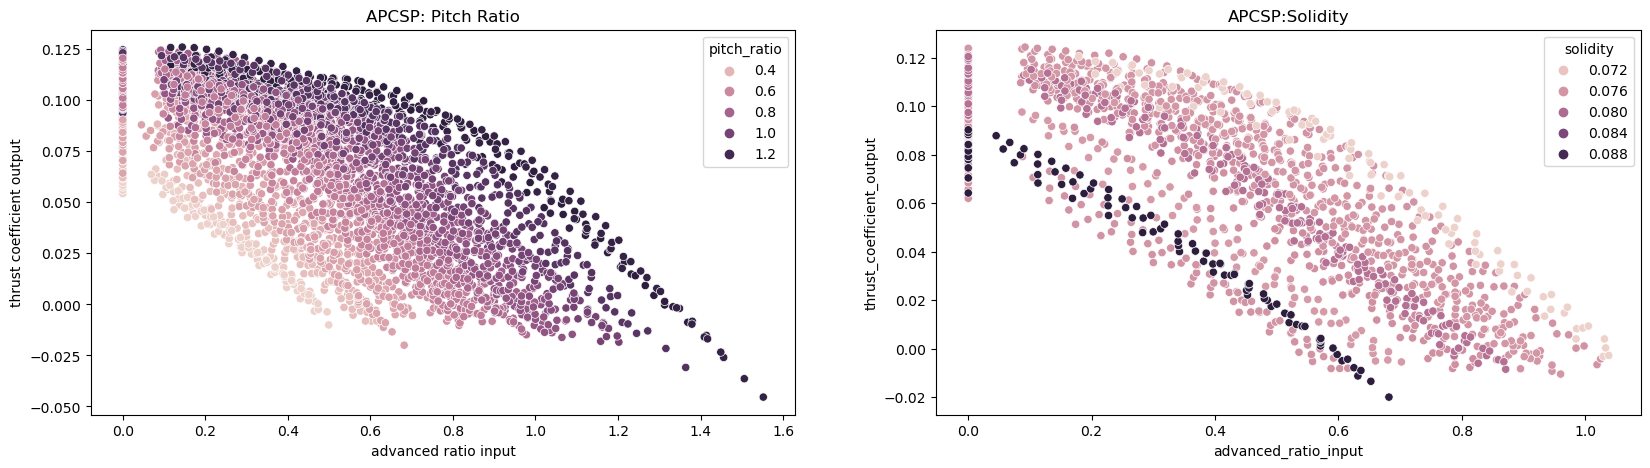

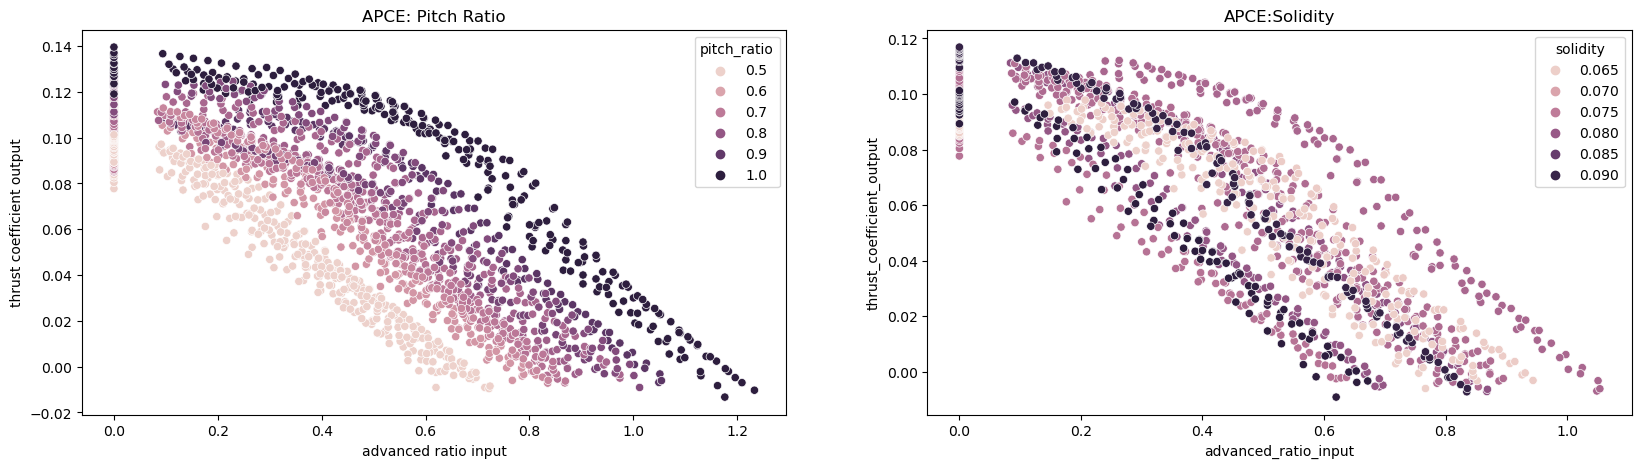

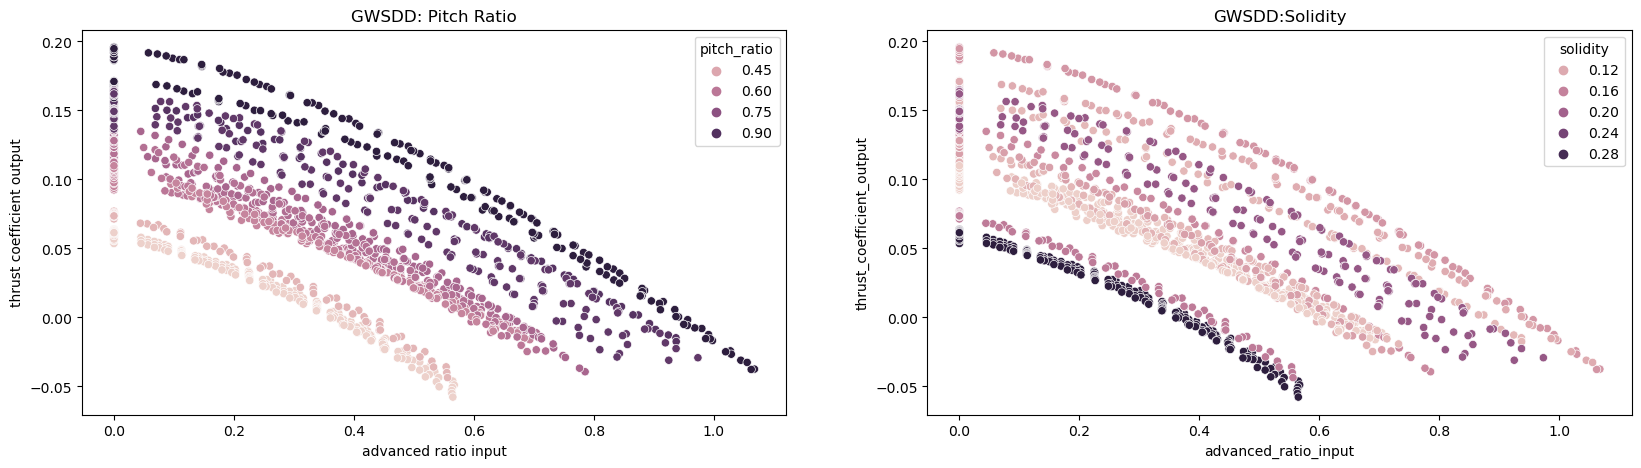

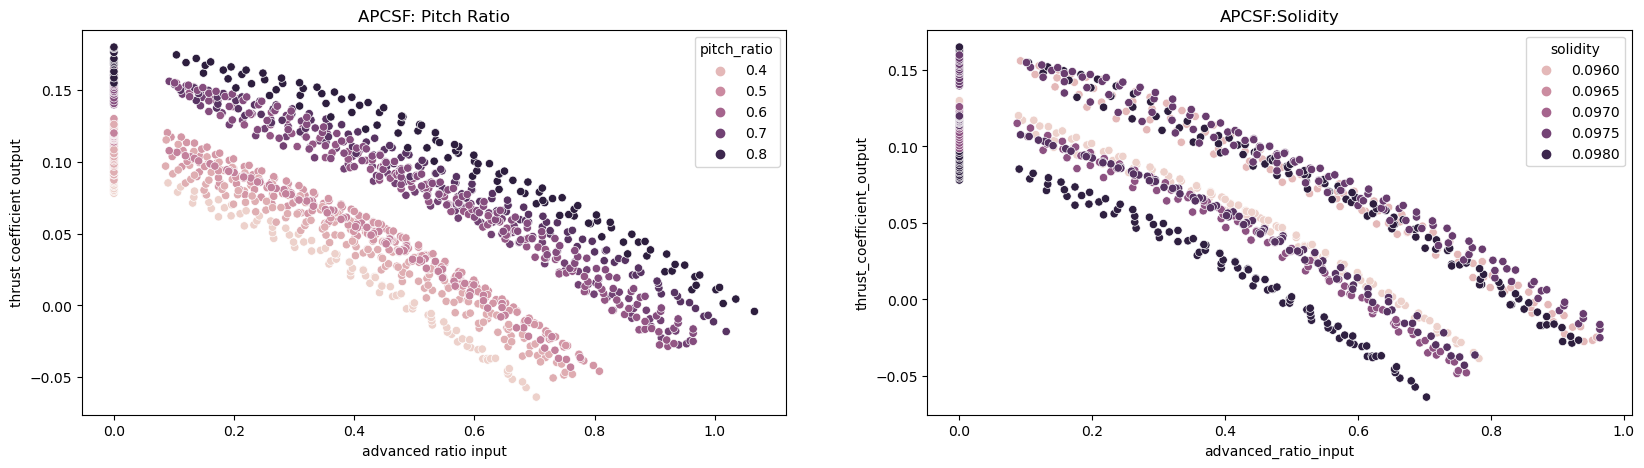

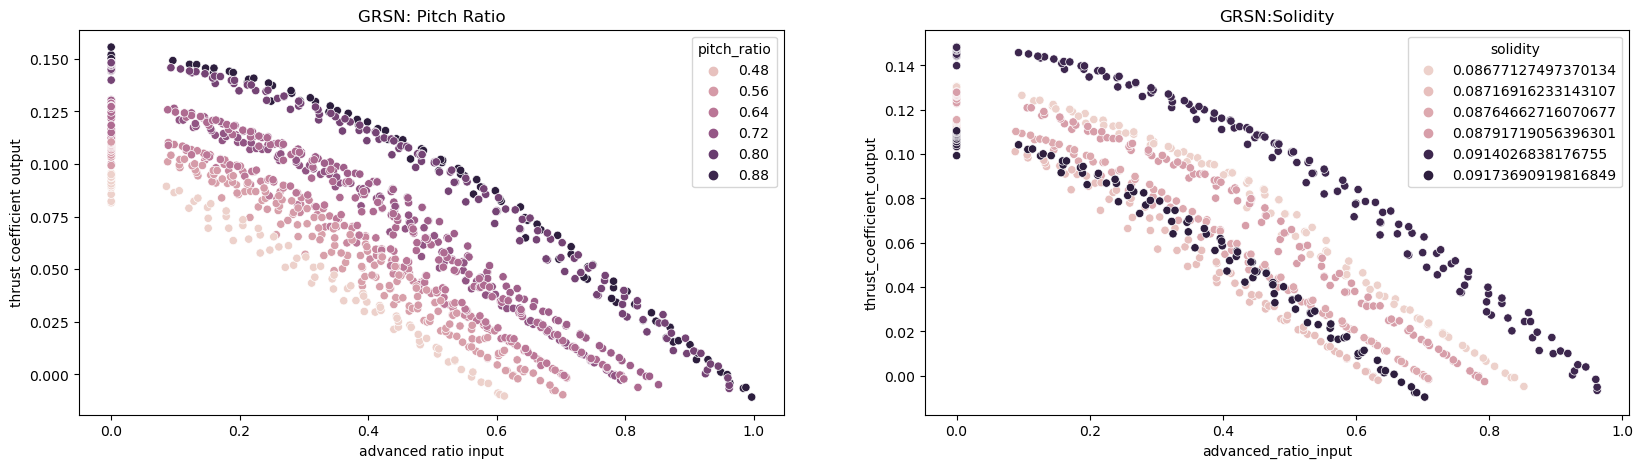

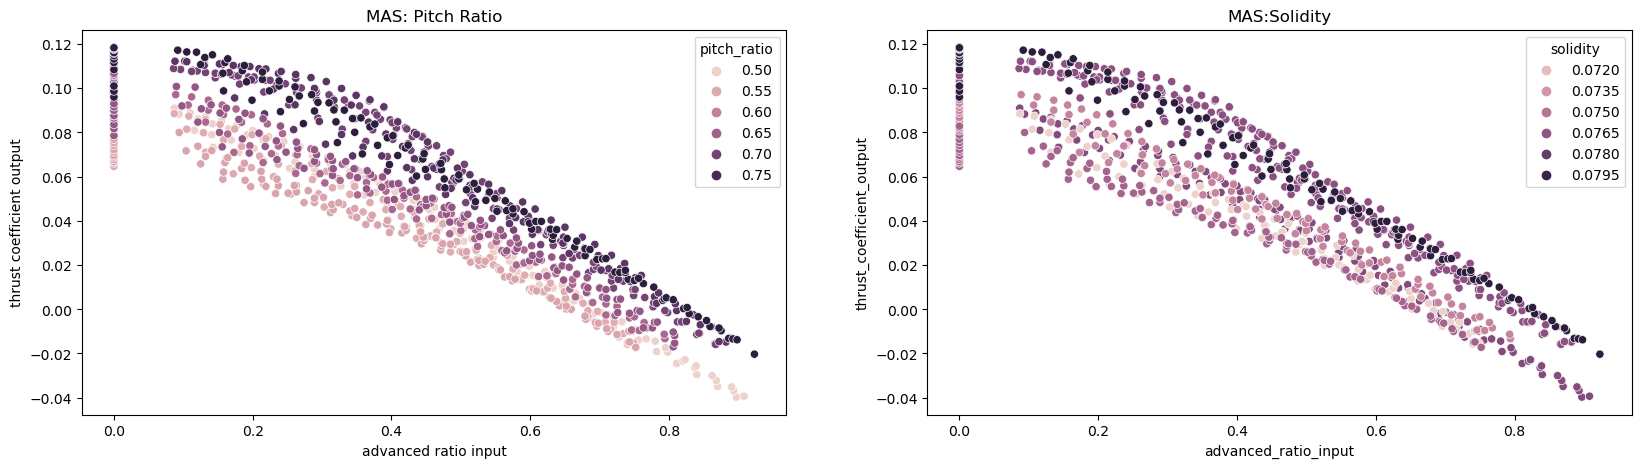

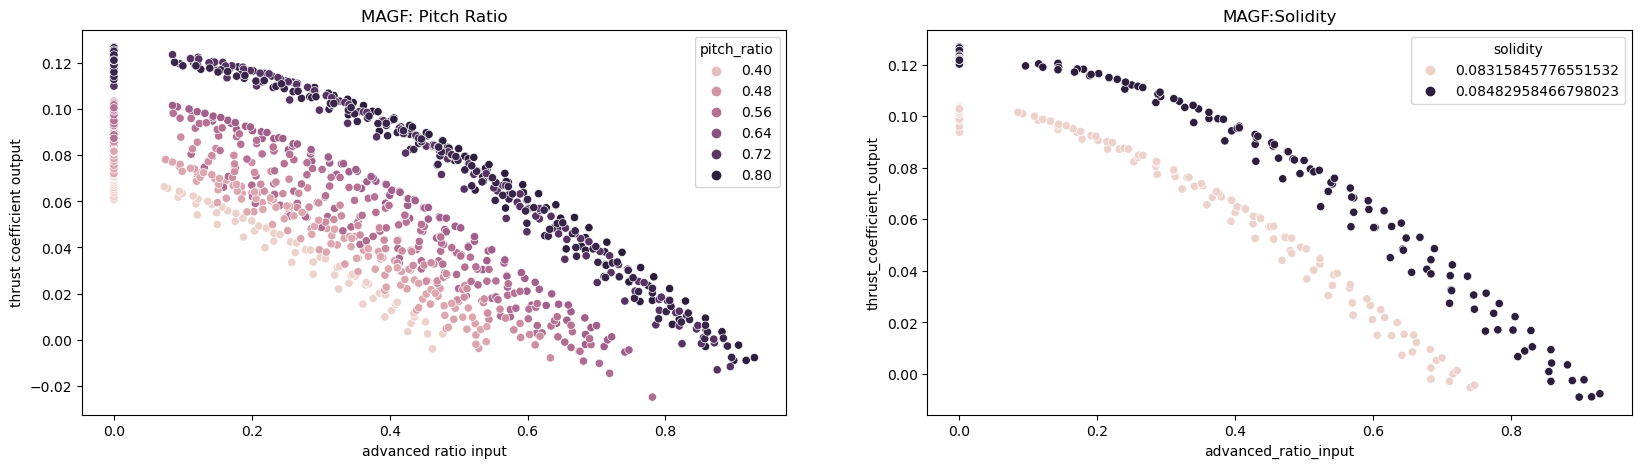

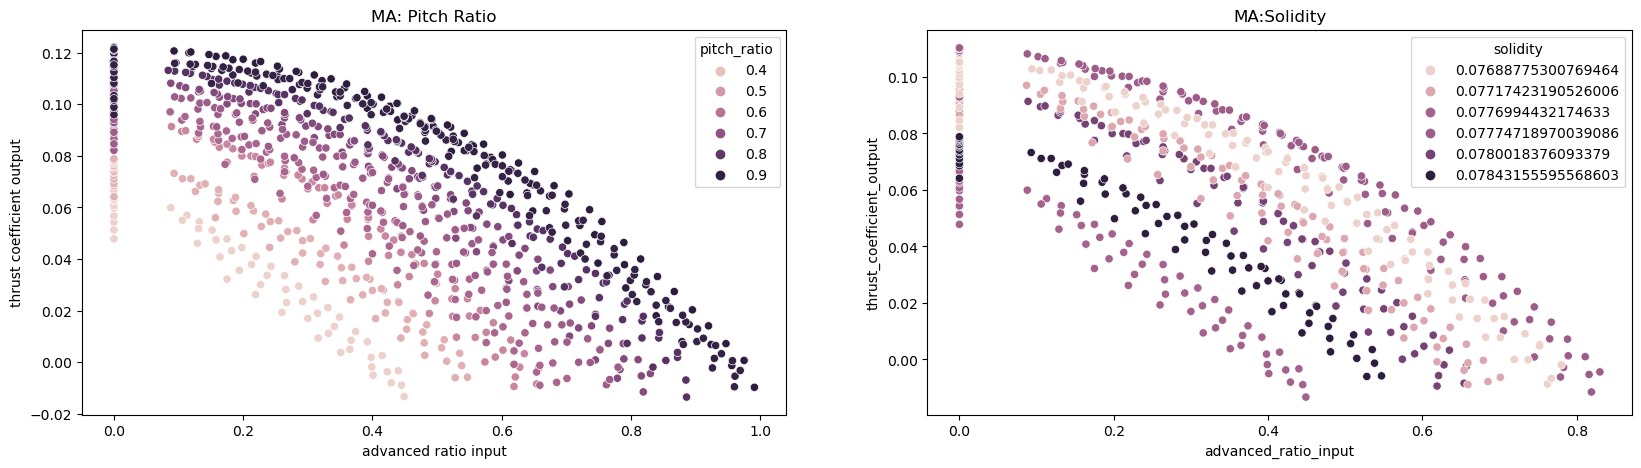

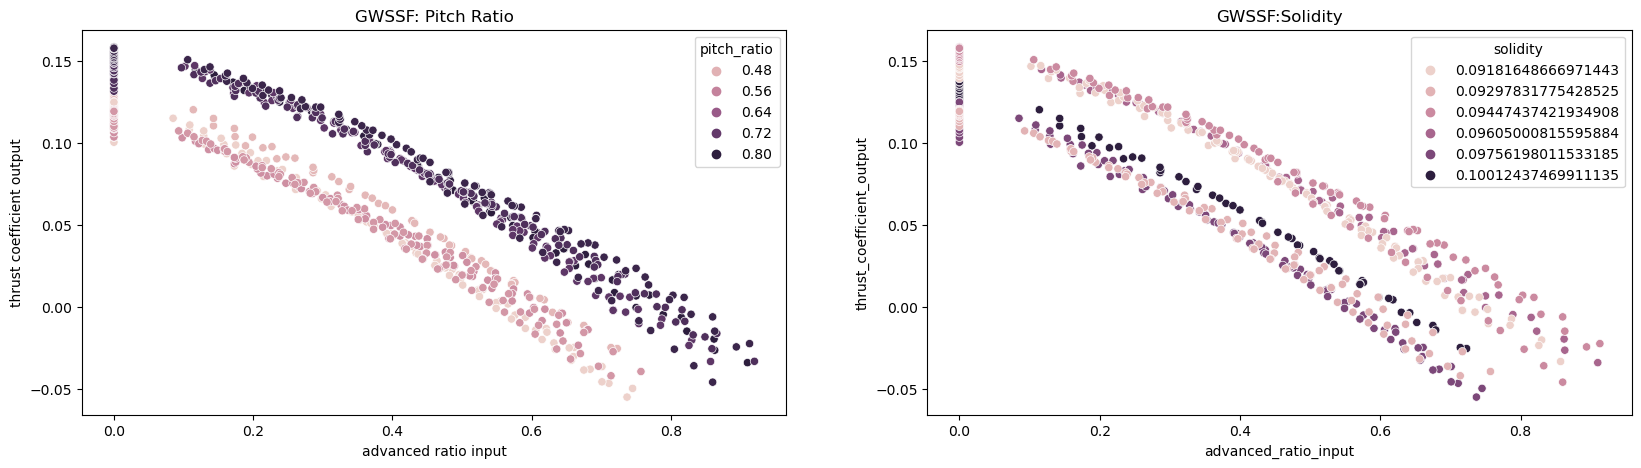

In [40]:
for brand in new_exp.propellers_brand.value_counts().index[:10]:
  subdata = new_exp.loc[new_exp.propellers_brand == brand,]
  f, ax = plt.subplots(1,2, figsize = (20,5))
  sns.scatterplot(x = 'advanced_ratio_input', y = 'thrust_coefficient_output', hue = 'pitch_ratio', data = subdata, ax = ax[0])
  sns.scatterplot(x = 'advanced_ratio_input', y = 'thrust_coefficient_output', hue = 'solidity', data = subdata, ax = ax[1])
  ax[0].set_title(brand.upper() + ': Pitch Ratio')
  ax[1].set_title(brand.upper() + ':Solidity')
  ax[0].set_ylabel('thrust coefficient output')
  ax[0].set_xlabel('advanced ratio input')
  plt.show()


# Create a heatmap to showcase correlation between the variables.

In [41]:
new_exp.describe()

,number_of_blades,propellers_diameter,propellers_pitch,advanced_ratio_input,rpm_rotation_input,thrust_coefficient_output,power_coefficient_output,efficiency_output,solidity,pitch_ratio
count,27495.000000,27495.000000,27495.000000,27495.000000,27495.000000,27495.000000,27495.000000,27495.000000,14211.000000,27495.000000
mean,2.045790,9.443751,6.420748,0.423310,5470.285834,0.063996,0.046393,0.318133,0.096116,0.736696
std,0.266954,2.766641,2.411737,0.278554,2756.465916,0.044331,0.026629,0.539775,0.040879,0.539964
min,2.000000,1.200000,0.600000,0.000000,940.000000,-0.126140,0.002500,-22.698791,0.054743,0.048000
25%,2.000000,9.000000,4.960000,0.208000,4012.000000,0.029395,0.026810,0.133000,0.076888,0.545455
50%,2.000000,10.000000,6.000000,0.429000,5018.000000,0.066372,0.043094,0.456781,0.082920,0.666667
75%,2.000000,11.000000,8.000000,0.622245,6021.000000,0.097700,0.060690,0.613000,0.096002,0.800000
max,4.000000,19.000000,13.000000,1.552000,27050.000000,0.253789,0.192791,0.840262,0.300871,5.416667


In [61]:
new_exp.columns

Index(['propellers_name', 'blades_name', 'propellers_brand',
       'number_of_blades', 'propellers_diameter', 'propellers_pitch',
       'advanced_ratio_input', 'rpm_rotation_input',
       'thrust_coefficient_output', 'power_coefficient_output',
       'efficiency_output', 'solidity', 'pitch_ratio'],
      dtype='object')

In [42]:
m = np.ones_like(new_exp.corr())
m[np.tril_indices_from(m)]= 0
plt.figure(figsize = (20,7))
sns.heatmap(new_exp.corr(), mask = m, annot = True)
plt.show()

ValueError: could not convert string to float: 'ance 8.5x6.0 - 2'

Solidity is well correlated with D and P. We will use this instances to build a imputation model. We won't use B because data is only missing to propellers with two blades.



In [ ]:
new_exp.columns

# Machine Learning:
Do we have missing values in the data? Perform missing value treatment.

In [43]:
new_exp.isna().sum()

propellers_name                  0
blades_name                      0
propellers_brand                 0
number_of_blades                 0
propellers_diameter              0
propellers_pitch                 0
advanced_ratio_input             0
rpm_rotation_input               0
thrust_coefficient_output        0
power_coefficient_output         0
efficiency_output                0
solidity                     13284
pitch_ratio                      0
dtype: int64

# Split the data into train and test before missing value imputation.


# filter data for 2 blades only 

In [64]:
new_exp_data = new_exp.loc[new_exp.number_of_blades ==2,]
new_exp_data.shape

(26615, 13)

In [65]:
Target = ['thrust_coefficient_output','power_coefficient_output','efficiency_output' ]
Predictors = ['propellers_brand', 'propellers_diameter', 'propellers_pitch',
       'advanced_ratio_input', 'rpm_rotation_input', 'solidity',
       'pitch_ratio']

In [66]:
np.random.seed(12)
test_idx = np.random.choice(new_exp_data.index, int(new_exp_data.shape[0]*0.25), replace=False)
train_idx = new_exp_data.drop(index = test_idx).index
train_idx

Index([    1,     3,     4,     5,     9,    10,    11,    12,    13,    14,
       ...
       27481, 27482, 27483, 27484, 27485, 27487, 27489, 27490, 27492, 27494],
      dtype='int64', length=19962)

In [67]:
X = new_exp_data[Predictors]
X = pd.get_dummies(X)

In [68]:
y_df = new_exp_data[Target]

In [69]:
X_train = X.loc[train_idx]
y_train_df = y_df.loc[train_idx]

In [70]:
X_test = X.loc[test_idx]
y_test_df = y_df.loc[test_idx]


Create models to predict performance of a propeller. Performance metrics have been described earlier. Please follow the instructions given below:

Build your model for those propellers which have 2 blades. Then evaluate the model for other propellers
Use XGBOOST technique for model building
Create 3 types of models – Without missing value imputation, with missing value imputation and without Solidity. Compare the performance of all the models. Use appropriate visualizations to support your arguments


# without mising value imputation

In [71]:
train_no_miss = X_train.dropna()
test_no_miss = X_test.dropna()

In [72]:
y_train_no_miss = y_train_df.loc[train_no_miss.index]
y_test_no_miss = y_test_df.loc[test_no_miss.index]

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

In [74]:
param_space = {
          'Gradient Boosting__n_estimators' : [50, 100, 500, 1000, 1500],
          'Gradient Boosting__max_depth':[5, 10, 15, 20, 25, 50 ]
          }
sc = StandardScaler()
pipe = Pipeline([('sc',sc), ('Gradient Boosting', model)])

search = RandomizedSearchCV(estimator = pipe, 
                            param_distributions = param_space, scoring='neg_root_mean_squared_error', 
                                cv=5, refit=True, return_train_score = True,
                                random_state = 12, n_jobs = -1, n_iter = 2)

In [75]:
param_space = {
          'Gradient Boosting__n_estimators' : [50, 100],
          'Gradient Boosting__max_depth':[10, 15, 20]
          
          }
sc = StandardScaler()
pipe = Pipeline([('sc',sc), ('Gradient Boosting', model)])

search = RandomizedSearchCV(estimator = pipe, 
                            param_distributions = param_space, scoring='neg_root_mean_squared_error', 
                                cv=5, refit=True, return_train_score = True,
                                random_state = 12, n_jobs = -1, n_iter = 2)

In [76]:
train_results = {}
test_results = {}
for target in Target:
  Y_train = y_train_no_miss[target]
  Y_test = y_test_no_miss[target]
  result = search.fit(train_no_miss, Y_train )
  train_pred = result.predict(train_no_miss)
  test_pred= result.predict(test_no_miss)
  train_results[target] = mean_squared_error(y_true = Y_train, y_pred = train_pred, squared = False) 
  test_results[target] = mean_squared_error(y_true = Y_test, y_pred = test_pred, squared = False)

In [77]:
final_results_train  = pd.DataFrame(train_results, index = ['without imputation'])
final_results_test  = pd.DataFrame(test_results, index = ['without imputation'])

In [78]:
final_results_train

,thrust_coefficient_output,power_coefficient_output,efficiency_output
without imputation,0.001509,0.000992,0.03604


In [79]:
final_results_test

,thrust_coefficient_output,power_coefficient_output,efficiency_output
without imputation,0.003047,0.001998,0.166184


# With Imputation


In [80]:
new_exp.isna().sum()

propellers_name                  0
blades_name                      0
propellers_brand                 0
number_of_blades                 0
propellers_diameter              0
propellers_pitch                 0
advanced_ratio_input             0
rpm_rotation_input               0
thrust_coefficient_output        0
power_coefficient_output         0
efficiency_output                0
solidity                     13284
pitch_ratio                      0
dtype: int64

In [81]:
props = new_exp.drop(columns = ['advanced_ratio_input', 'rpm_rotation_input'] + Target).drop_duplicates()
props_train = new_exp.loc[train_idx].drop(columns = ['advanced_ratio_input', 'rpm_rotation_input'] + Target).drop_duplicates()

In [82]:
imp = KNNImputer(n_neighbors=5)
imp.fit(props_train.loc[:, ['propellers_pitch', 'propellers_diameter', 'solidity']])

KNNImputer()

In [83]:
x_imp_tr = imp.transform(props.loc[:,['propellers_pitch', 'propellers_diameter', 'solidity']])
props['solidity'] = x_imp_tr[:,-1]

In [84]:
props.head(2)

,propellers_name,blades_name,propellers_brand,number_of_blades,propellers_diameter,propellers_pitch,solidity,pitch_ratio
0,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.081614,0.705882
94,ance 8.5x7.0 - 2,ance 8.5x7.0,ance,2,8.5,7.0,0.093144,0.823529


In [85]:
data_impute = new_exp.drop(columns = 'solidity').merge(props[['propellers_name', 'blades_name','solidity']], 
                                         how = 'left', on = ['propellers_name', 'blades_name'])

In [86]:
data_impute = data_impute.loc[data_impute.number_of_blades==2,]

In [87]:
X = data_impute[Predictors]
X = pd.get_dummies(X)


In [88]:
y_df = new_exp_data[Target]

In [89]:
X_train = X.loc[train_idx]
y_train_df = y_df.loc[train_idx]

In [90]:
X_test = X.loc[test_idx]
y_test_df = y_df.loc[test_idx]

In [91]:
param_space = {
          'Gradient Boosting__n_estimators' : [50, 100],
          'Gradient Boosting__max_depth':[10, 15, 20]
          }
sc = StandardScaler()
pipe = Pipeline([('sc',sc), ('Gradient Boosting', model)])

search = RandomizedSearchCV(estimator = pipe, 
                            param_distributions = param_space, scoring='neg_root_mean_squared_error', 
                                cv=5, refit=True, return_train_score = True,
                                random_state = 12, n_jobs = -1, n_iter = 2)
train_results = {}
test_results = {}
for target in Target:
  Y_train = y_train_df[target]
  Y_test = y_test_df[target]
  result = search.fit(X_train, Y_train )
  train_pred = result.predict(X_train)
  test_pred= result.predict(X_test)
  train_results[target] = mean_squared_error(y_true = Y_train, y_pred = train_pred, squared = False) 
  test_results[target] = mean_squared_error(y_true = Y_test, y_pred = test_pred, squared = False)

In [92]:
final_results_train.loc['with imputation'] = train_results.values()
final_results_test.loc['with imputation'] = test_results.values()

# without Solidity 

In [93]:
X = new_exp_data[Predictors]
X = pd.get_dummies(X)

In [94]:
y_df = new_exp_data[Target]

In [95]:
X_sol = X.drop(columns = 'solidity')
X_test = X_sol.loc[test_idx]
y_test_df = y_df.loc[test_idx]
X_train = X_sol.drop(index = test_idx)
y_train_df = y_df.drop(index = test_idx)
param_space = {
          'Gradient Boosting__n_estimators' : [50, 100],
          'Gradient Boosting__max_depth':[10, 15, 20]
          }
sc = StandardScaler()

pipe = Pipeline([('sc',sc), ('Gradient Boosting', model)])

search = RandomizedSearchCV(estimator = pipe, 
                            param_distributions = param_space, scoring='neg_root_mean_squared_error', 
                                cv=5, refit=True, return_train_score = True,
                                random_state = 12, n_jobs = -1, n_iter = 2)
train_results = {}
test_results = {}
for target in Target:
  Y_train = y_train_df[target]
  Y_test = y_test_df[target]
  result = search.fit(X_train, Y_train )
  train_pred = result.predict(X_train)
  test_pred= result.predict(X_test)
  train_results[target] = mean_squared_error(y_true = Y_train, y_pred = train_pred, squared = False) 
  test_results[target] = mean_squared_error(y_true = Y_test, y_pred = test_pred, squared = False)

In [96]:
final_results_train.loc['without solidity'] = train_results.values()
final_results_test.loc['without solidity'] = test_results.values()

In [97]:
final_results_train

,thrust_coefficient_output,power_coefficient_output,efficiency_output
without imputation,0.001509,0.000992,0.036040
with imputation,0.002429,0.001328,0.046641
without solidity,0.002901,0.001697,0.050674


In [98]:
final_results_test

,thrust_coefficient_output,power_coefficient_output,efficiency_output
without imputation,0.003047,0.001998,0.166184
with imputation,0.003520,0.001945,0.275681
without solidity,0.003929,0.002208,0.278714


In [99]:
final_results_test

,thrust_coefficient_output,power_coefficient_output,efficiency_output
without imputation,0.003047,0.001998,0.166184
with imputation,0.003520,0.001945,0.275681
without solidity,0.003929,0.002208,0.278714
